In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
import copy

In [2]:
#a
R = 1
d = 0.1*R
magnets = np.array([(-1*R,0), (R,0)])

def Aksel(x, y):
    ax = 0
    ay = 0
    for i in range(len(magnets)):
        D = (((x-magnets[i][0])**2 + (y-magnets[i][1])**2 + d**2)**1.5)
        ax -= (x-magnets[i][0])/D
        ay -= (y-magnets[i][1])/D
    return ax, ay

def k(t, w):
    cop=copy.copy(w)
    ax, ay = Aksel(w[0], w[1])
    cop[0] = w[2]
    cop[1] = w[3]
    cop[2] = ax
    cop[3] = ay
    return cop

def Euler(w, h):
    k1 = k(0, w)
    return w + h*k1

def Heun(w, h):
    k1 = k(0, w)
    k2 = k(0, w+h*k1)
    return w + h/2*(k1+k2)
    
def Runge_Kutta4(w, h):
    k1 = k(0, w)
    k2 = k(0, w+h/2*k1)
    k3 = k(0, w+h/2*k2)
    k4 = k(0, w+h*k3)
    return w + h/6*(k1+2*k2+2*k3+k4)

<function matplotlib.pyplot.show(*args, **kw)>

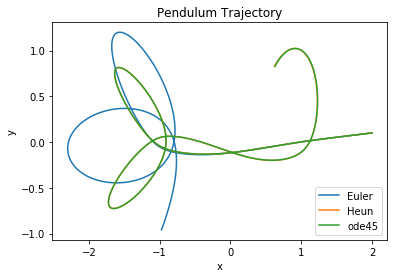

In [168]:
#b
h = 0.001
t = 10
n = int(t/h)

x_0 = 2.0
y_0 = 0.1
u_0 = 0
v_0 = 0

Ew = np.array([x_0, y_0, u_0, v_0])
Hw = np.array([x_0, y_0, u_0, v_0])
#Rw = np.array([x_0, y_0, u_0, v_0])

Ex = np.array([x_0])
Ey = np.array([y_0])
Eu = np.array([u_0])
Ev = np.array([v_0])

Hx = np.array([x_0])
Hy = np.array([y_0])
Hu = np.array([u_0])
Hv = np.array([v_0])

#Rx = np.array([x_0])
#Ry = np.array([y_0])
#Ru = np.array([u_0])
#Rv = np.array([v_0])

for i in range(n):
    Ew = Euler(Ew, h)
    Hw = Heun(Hw, h)
    Rw = Runge_Kutta4(Rw, h)
    
    Ex = np.append(Ex, Ew[0])
    Ey = np.append(Ey, Ew[1])
    Eu = np.append(Eu, Ew[2])
    Ev = np.append(Ev, Ew[3])
    
    Hx = np.append(Hx, Hw[0])
    Hy = np.append(Hy, Hw[1])
    Hu = np.append(Hu, Hw[2])
    Hv = np.append(Hv, Hw[3])

#    Rx = np.append(Rx, Rw[0])
#    Ry = np.append(Ry, Rw[1])
#    Ru = np.append(Ru, Rw[2])
#    Rv = np.append(Rv, Rw[3])
    
sol = solve_ivp(k, [0, t], [2, 0.1, 0, 0], method = 'RK45', rtol = 1e-6, atol = 1e-9 ,dense_output=True)
t = np.linspace(0, t, n)
z = sol.sol(t)

plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(Ex, Ey, label = "Euler")
plt.plot(Hx, Hy, label = "Heun")
#plt.plot(Rx, Ry, label = "RK4")
plt.plot(z[0], z[1], label = "ode45")
plt.legend(loc =4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

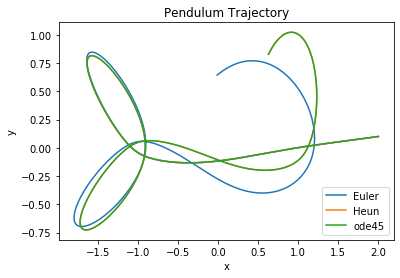

In [169]:
#c
h = 0.0001
T = 10
n = int(T/h)

x_0 = 2.0
y_0 = 0.1
u_0 = 0
v_0 = 0

Ew = np.array([x_0, y_0, u_0, v_0])
Hw = np.array([x_0, y_0, u_0, v_0])

Ex = np.array([x_0])
Ey = np.array([y_0])
Eu = np.array([u_0])
Ev = np.array([v_0])

Hx = np.array([x_0])
Hy = np.array([y_0])
Hu = np.array([u_0])
Hv = np.array([v_0])

for i in range(n):
    Ew = Euler(Ew, h)
    Hw = Heun(Hw, h)
    if i%10==9:
        Ex = np.append(Ex, Ew[0])
        Ey = np.append(Ey, Ew[1])
        Eu = np.append(Eu, Ew[2])
        Ev = np.append(Ev, Ew[3])
    
        Hx = np.append(Hx, Hw[0])
        Hy = np.append(Hy, Hw[1])
        Hu = np.append(Hu, Hw[2])
        Hv = np.append(Hv, Hw[3])

L = len(Ex)
sol = solve_ivp(k, [0, T], [2, 0.1, 0, 0],method='RK45', rtol = 1e-6, atol = 1e-9 , dense_output=True)
t = np.linspace(0, T, L)
z = sol.sol(t)


plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(Ex, Ey, label = "Euler")
plt.plot(Hx, Hy, label = "Heun")
plt.plot(z[0], z[1], label = "ode45")
plt.legend(loc =4)
plt.show

[0.000e+00 1.000e-03 2.000e-03 ... 9.998e+00 9.999e+00 1.000e+01]


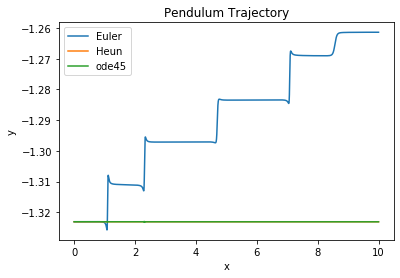

In [170]:
#e
def E_kin(u, v):
    return 0.5*(u**2+v**2)
def E_pot(x, y):
    E = 0
    for i in range(len(magnets)):
        E  -= 1/np.sqrt((x-magnets[i][0])**2 + (y-magnets[i][1])**2 + d**2)
    return E

EE = E_kin(Eu, Ev) + E_pot(Ex, Ey)
HE = E_kin(Hu, Hv) + E_pot(Hx, Hy)
OE = E_kin(z[2], z[3]) + E_pot(z[0], z[1])

plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t, EE, label = "Euler")
plt.plot(t, HE, label = "Heun")
plt.plot(t, OE, label = "ode45")
plt.legend(loc =2)
plt.show
print(t)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


<function matplotlib.pyplot.show(*args, **kw)>

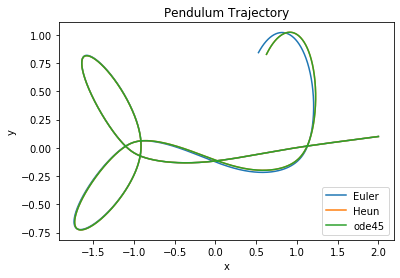

In [175]:
#c
h = 0.00001
T = 10
n = int(T/h)

x_0 = 2.0
y_0 = 0.1
u_0 = 0
v_0 = 0

Ew = np.array([x_0, y_0, u_0, v_0])
Hw = np.array([x_0, y_0, u_0, v_0])

Ex = np.array([x_0])
Ey = np.array([y_0])
Eu = np.array([u_0])
Ev = np.array([v_0])

Hx = np.array([x_0])
Hy = np.array([y_0])
Hu = np.array([u_0])
Hv = np.array([v_0])

for i in range(n):
    if i%100000==0:
        print(i)
    Ew = Euler(Ew, h)
    Hw = Heun(Hw, h)

    if (i+1)%100==0:
        Ex = np.append(Ex, Ew[0])
        Ey = np.append(Ey, Ew[1])
        Eu = np.append(Eu, Ew[2])
        Ev = np.append(Ev, Ew[3])
    
        Hx = np.append(Hx, Hw[0])
        Hy = np.append(Hy, Hw[1])
        Hu = np.append(Hu, Hw[2])
        Hv = np.append(Hv, Hw[3])

L = len(Ex)

sol = solve_ivp(k, [0, T], [2, 0.1, 0, 0], rtol = 1e-9, atol = 1e-12 , dense_output=True)
t = np.linspace(0, T, L)
z = sol.sol(t)


plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(Ex, Ey, label = "Euler")
plt.plot(Hx, Hy, label = "Heun")
plt.plot(z[0], z[1], label = "ode45")
plt.legend(loc =4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

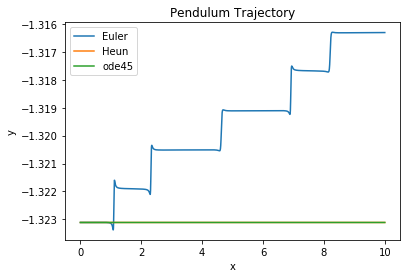

In [177]:
#e
def E_kin(u, v):
    return 0.5*(u**2+v**2)
def E_pot(x, y):
    E = 0
    for i in range(len(magnets)):
        E  -= 1/np.sqrt((x-magnets[i][0])**2 + (y-magnets[i][1])**2 + d**2)
    return E

EE = E_kin(Eu, Ev) + E_pot(Ex, Ey)
HE = E_kin(Hu, Hv) + E_pot(Hx, Hy)
OE = E_kin(z[2], z[3]) + E_pot(z[0], z[1])

plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t, EE, label = "Euler")
plt.plot(t, HE, label = "Heun")
plt.plot(t, OE, label = "ode45")
plt.legend(loc =2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

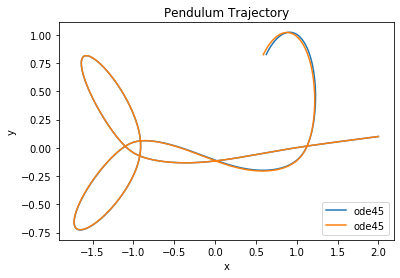

In [186]:
#g y_0 = 0.10001 was indistinguishable from y_0 = 0.1, so I used here 0.1001 instead
sol1 = solve_ivp(k, [0, T], [2, 0.1, 0, 0], rtol = 1e-9, atol = 1e-12 , dense_output=True)
sol2 = solve_ivp(k, [0, T], [2, 0.1001, 0, 0], rtol = 1e-9, atol = 1e-12 , dense_output=True)
t = np.linspace(0, T, L)
z = sol1.sol(t)
q = sol2.sol(t)
plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(z[0], z[1], label = "ode45")
plt.plot(q[0], q[1], label = "ode45")
plt.legend(loc =4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

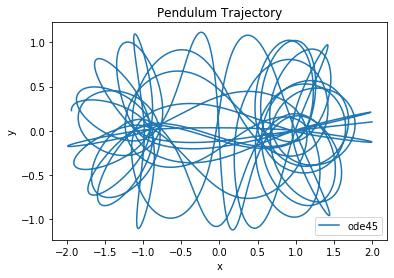

In [192]:
#h
sol = solve_ivp(k, [0, 100], [2, 0.1, 0, 0], rtol = 1e-9, atol = 1e-12 , dense_output=True)
t = np.linspace(0, 100, L)
z = sol.sol(t)
plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(z[0], z[1], label = "ode45")
plt.legend(loc =4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

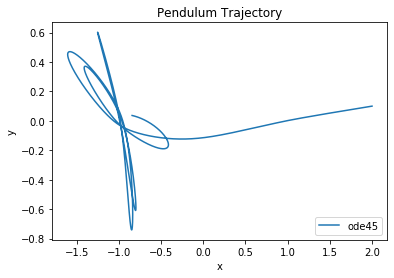

In [193]:
#i
alpha = 0.05
def k(t, w):
    cop=copy.copy(w)
    ax, ay = Aksel(w[0], w[1])
    cop[0] = w[2]
    cop[1] = w[3]
    cop[2] = ax - w[2]*alpha
    cop[3] = ay - w[3]*alpha
    return cop


sol = solve_ivp(k, [0, T], [2, 0.1, 0, 0], rtol = 1e-9, atol = 1e-12 , dense_output=True)
t = np.linspace(0, T, L)
z = sol.sol(t)
plt.figure(1)
plt.title("Pendulum Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(z[0], z[1], label = "ode45")
plt.legend(loc =4)
plt.show

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


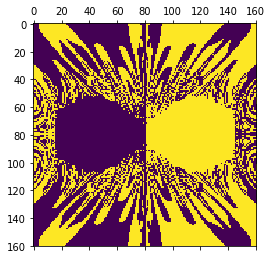

In [18]:
#j
a, b = -2, 2
N = 161
T = 10
L = 50
grid = np.linspace(a, b, N)
matrix = np.zeros([N,N])
for i in range(N):
    if i%10==0:
        print(i)
    for j in range(N):
        sol = solve_ivp(k, [0, T], [grid[i], grid[j], 0, 0], rtol = 1e-6, atol = 1e-9 , dense_output=True)
        t = np.linspace(0, T, L)
        z = sol.sol(t)
        if z[0][-1] > 0:
            matrix[i][j] = 1

            
plt.matshow(matrix.T)        